# 工作流程
* 載入需要的套件
* 從COCO的驗證資料集中找一張範例照片，並且網上下載，顯示照片
* 進行物件偵測，做方框標記
* 列出偵測出來的類別代碼，以及方框座標
* 列出代碼對應的物件
* 顯示辨識出來的圖形
* 展示骨骼標記
* 展示全景分割

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1  #電腦使用哪一種Python套件管理程式。如果你不知道要這是什么,假定是pip


import torch, torchvision
print(torch.__version__, torch.cuda.is_available()) 
!gcc --version   #可以得到Ubuntu的版本   #gcc是開放原始碼
# opencv is pre-installed on colab

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 6.6MB 615kB/s 
     |████████████████████████████████| 2.2MB 11.5MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201020-cp36-none-any.whl size=44210 sha256=c9f806eb382398a3628259ddb5dfb20c598d47093c16933a4f372cdd505f2324
  Stored in directory: /root/.cache/pip/wheels/71/6c/b5/198f89a5c5f127327730248cc623e5a307ad11ed287c3fe391
Successfully built fvcore
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
import detectron2   
import cv2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from matplotlib import pyplot as plt

--2020-10-27 05:11:12--  https://www.ncpb.gov.tw/df_ufiles/zhongxing/s_%E5%BD%A2%E8%B1%A1%E5%9C%96-%E4%B8%AD%E8%88%88%E5%88%86%E5%B1%80-%E7%9F%AD%E8%A2%96.jpg
Resolving www.ncpb.gov.tw (www.ncpb.gov.tw)... 163.29.90.153, 2001:4420:7503:1::53
Connecting to www.ncpb.gov.tw (www.ncpb.gov.tw)|163.29.90.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 378178 (369K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 369.31K   467KB/s    in 0.8s    

2020-10-27 05:11:15 (467 KB/s) - ‘input.jpg’ saved [378178/378178]



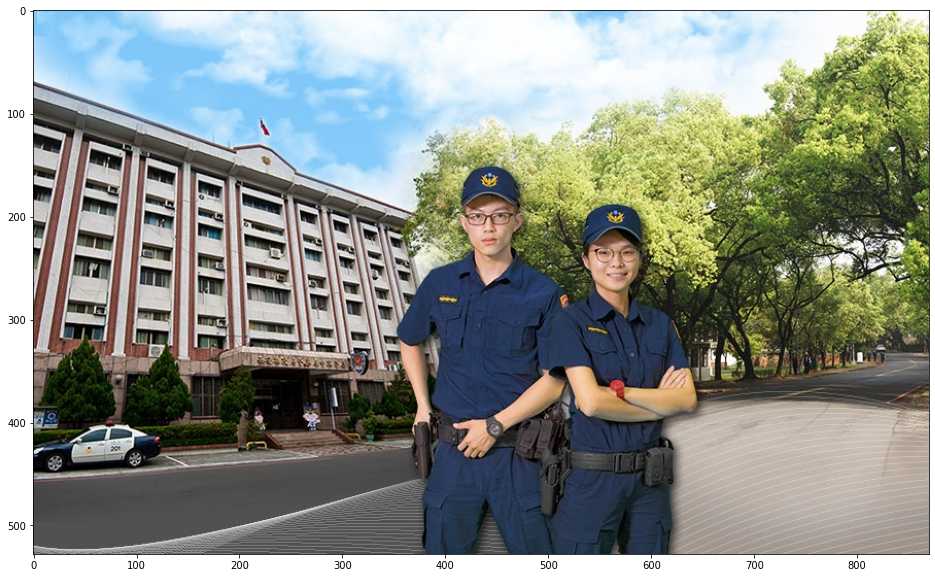

In [ ]:
!wget https://www.ncpb.gov.tw/df_ufiles/zhongxing/s_%E5%BD%A2%E8%B1%A1%E5%9C%96-%E4%B8%AD%E8%88%88%E5%88%86%E5%B1%80-%E7%9F%AD%E8%A2%96.jpg -O input.jpg   #!改圖片網址
#!wget http://images.cocodataset.org/val2017/000000398742.jpg -O input.jpg   #利用wegt下載圖片
im = cv2.imread("./input.jpg")  #讀取圖片檔
plt.figure(figsize=(20,10))    #創建一個圖形對象
plt.imshow(im[:,:,::-1])     #展示圖片

# 程式流程
* 宣告設定檔物件
* 取得設定檔，指定需要的模型種類
* 設定辨識值的門檻
* 下載模型
* 宣告偵測器，並且進行偵測
* 展示類別代碼及標記值
* 利用內建Visualizer將偵測出的圖形顯示出來

In [ ]:
# Inference with a object detection model
cfg = get_cfg()   #獲取已經配置好默認參數的cfg
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))    #config_file是指定的yaml配置文件，通過merge_from_file這個函數會將yaml文件中指定的超參數對默認值進行覆蓋。
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# If your detectron2's version is not the most updated, please use direct link as followed, to get the link , please visit 
# https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md

# cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"

predictor = DefaultPredictor(cfg)
outputs = predictor(im)


In [ ]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  2,  0,  0,  0,  0, 26], device='cuda:0')
Boxes(tensor([[358.6219, 155.0193, 521.7222, 526.7999],
        [432.5529, 186.2516, 645.5400, 526.3964],
        [  1.6101, 402.1184, 126.4206, 447.6868],
        [261.7095, 384.1596, 278.7762, 409.7256],
        [206.2823, 386.3997, 240.2656, 427.3302],
        [747.3165, 330.4203, 756.2241, 353.7203],
        [197.1633, 384.6701, 212.4942, 429.1225],
        [468.7517, 376.7448, 523.4871, 491.3459]], device='cuda:0'))


In [ ]:
all_things = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
preds = [all_things[x] for x in outputs["instances"].pred_classes]
preds

['person', 'person', 'car', 'person', 'person', 'person', 'person', 'handbag']

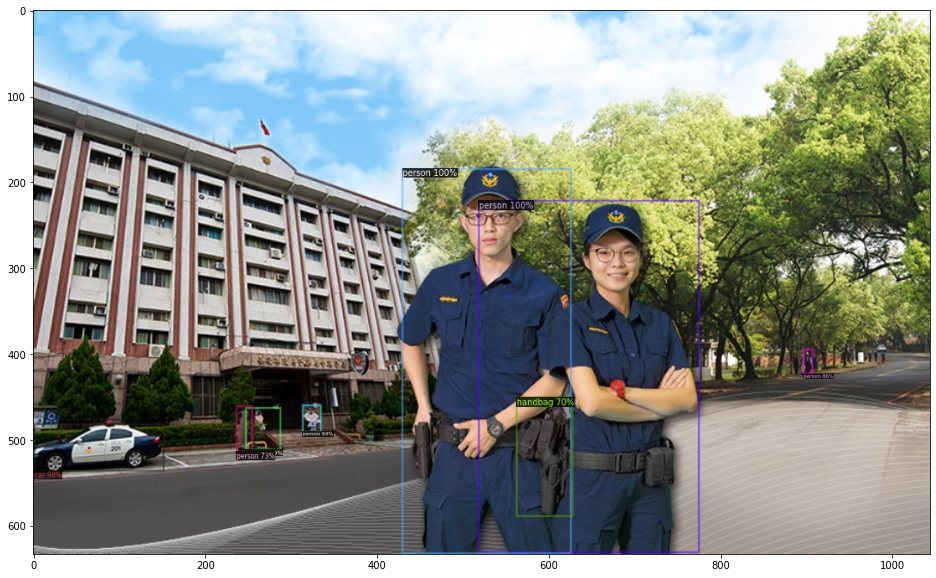

In [ ]:
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

model_final_f10217.pkl: 178MB [00:08, 22.1MB/s]                           


['person', 'person', 'car', 'person', 'person', 'person', 'person', 'handbag']


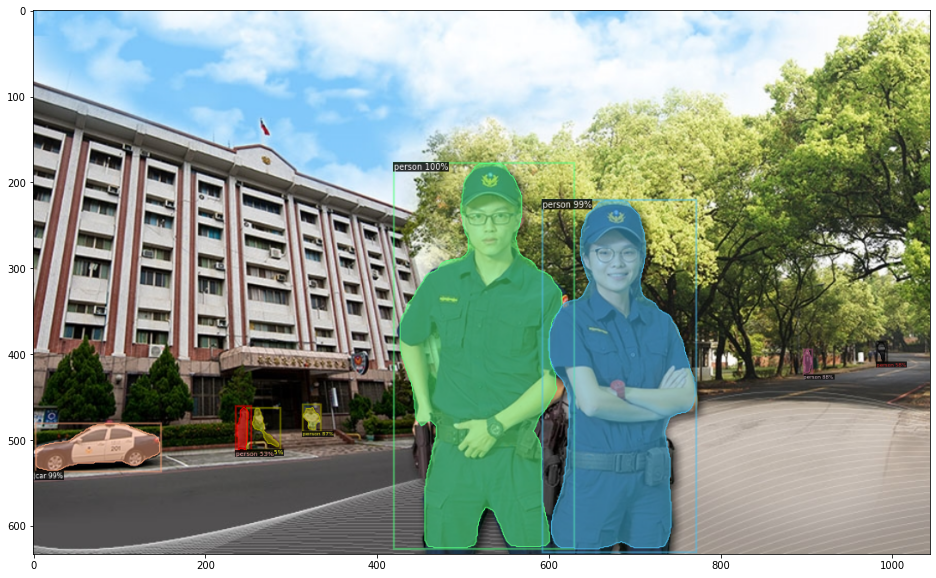

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
#cfg.MODEL.WEIGHTS = './model_final_f10217.pkl'
predictor = DefaultPredictor(cfg)
all_things = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
preds = [all_things[x] for x in outputs["instances"].pred_classes]
print(preds)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

model_final_a6e10b.pkl: 237MB [00:11, 21.0MB/s]                           


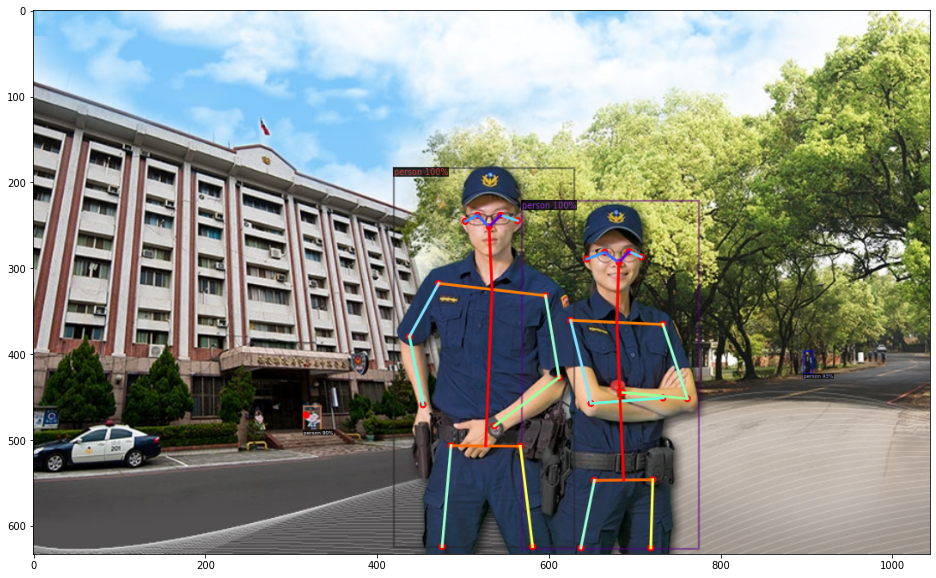

In [ ]:
# Inference with a keypoint detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

model_final_cafdb1.pkl: 261MB [00:12, 21.5MB/s]                           


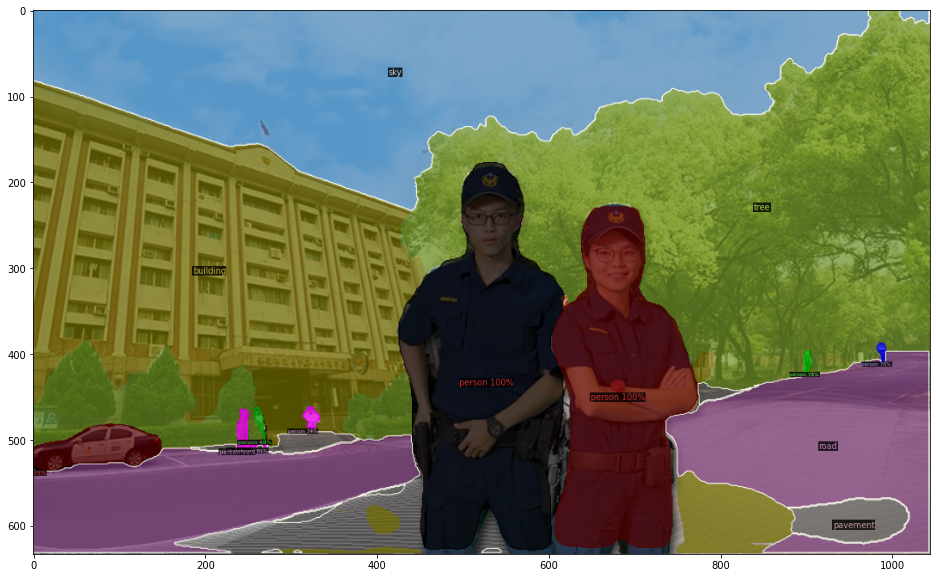

In [ ]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())